In [1]:
import pandas as pd
from sklearn import preprocessing
from soyviz import plot_los_tres
from combat.pycombat import pycombat
import matplotlib.pyplot as plt

In [2]:
venancio = pd.read_parquet('../expresion/venancio.parquet')
venancio

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMN00265078,5.453108,59.054636,1.408092,1.218809,0.000000,2.651369,2.801494,0.377480,0.523319,2.993846,...,0.0,0.000000,0.0,0.0,0.0,4.317951,0.421438,11.072744,0.000000,0.053070
SAMN00265079,6.500151,56.896441,6.155613,2.903028,14.714201,12.752819,4.904175,6.120868,7.059885,6.651526,...,0.0,0.000000,0.0,0.0,0.0,4.313916,0.000000,8.977273,0.518904,1.336911
SAMN00265080,3.103596,0.000000,4.038168,0.000000,2.434158,7.362351,1.693301,4.158352,9.958392,9.768484,...,0.0,0.000000,0.0,0.0,0.0,0.723192,0.000000,6.653363,0.000000,2.470588
SAMN00265081,4.226230,0.000000,4.021155,0.441538,2.820968,4.016449,1.627095,4.222031,7.327622,10.667464,...,0.0,0.000000,0.0,0.0,0.0,0.931953,0.297342,0.000000,0.390688,0.777894
SAMN00265082,2.582089,0.000000,1.710374,0.980639,5.646594,3.689870,1.837848,8.406095,5.689184,4.331051,...,0.0,0.000000,0.0,0.0,0.0,0.495017,0.000000,2.276112,0.000000,0.595369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN09295126,6.011819,0.000000,2.234152,0.000000,0.000000,2.596353,1.998173,0.000000,9.105045,4.742704,...,0.0,0.000000,0.0,0.0,0.0,8.817960,0.000000,32.194774,0.000000,0.000000
SAMN09295127,5.552961,21.092150,0.000000,0.000000,0.000000,0.000000,0.700031,1.792143,8.356985,3.354179,...,0.0,0.000000,0.0,0.0,0.0,5.273037,0.000000,0.000000,0.000000,0.604034
SAMN09295128,5.692426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.120328,4.756147,3.019845,...,0.0,0.000000,0.0,0.0,0.0,1.545678,0.000000,0.000000,0.000000,0.000000


In [3]:
condicion = pd.read_csv('../anotacion/condicion.csv', index_col=0)
condicion = condicion[condicion.isna().sum(axis=1) == 0]

In [4]:
sra = pd.read_csv('../metadata/sra.csv', index_col=0)
sra

/tmp/ipykernel_94372/2108350401.py:1: DtypeWarning: Columns (60,69,72,78,95,96,97,103,104,105,109,112,116,121,122,132,133,138,139,141,145,146,147,161,166,167,169,170,171,173,174,176,177,179,180,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,207,212,213,218,219,220,222,224,225,226,227,228,229,230,231,232,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  sra = pd.read_csv('../metadata/sra.csv', index_col=0)


,acc,assay_type,center_name,consent,experiment,sample_name,instrument,librarylayout,libraryselection,librarysource,...,quality_scoring_system_run,accession_ecotype_sam,tissue_and_developmental_stage_sam,experimental_factor__1_4_exp,concentration_sam,cultivation_pattren_sam,er_gfp_sam,subsrc_note_sam_s_dpl392,authors_sam,env_biome_sam
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00235537,DRR237204,RNA-Seq,RIKEN_CSRS,public,DRX227388,SAMD00235537,Illumina HiSeq 2500,PAIRED,PolyA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN30889879,SRR21660183,RNA-Seq,INNER MONGOLIA ACADEMY OF AGRICULTURAL & ANIMA...,public,SRX17659913,"CK (1,2,3,4)",Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN09513405,SRR7447776,RNA-Seq,THE OHIO STATE UNIVERSITY,public,SRX4318240,SL209648,Illumina HiSeq 2500,PAIRED,PolyA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN09078292,SRR7124263,RNA-Seq,GEO,public,SRX4045331,GSM3132253,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN36760700,SRR25459671,RNA-Seq,SOYBEAN,public,SRX21192507,R89-2-1,Illumina HiSeq 4000,PAIRED,PCR,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN25827181,SRR17968854,RNA-Seq,HUAZHONG AGRICULTURAL UNIVERSITY,public,SRX14125189,II-Early-12dpi-2C_rep2,Illumina HiSeq 4000,PAIRED,Oligo-dT,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN20971793,SRR15610895,RNA-Seq,GEO,public,SRX11908208,GSM5536784,AB SOLiD System 3.0,PAIRED,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN41726398,SRR29315715,RNA-Seq,NORTHEAST AGRICULTURAL UNIVERSITY,public,SRX24832506,HPHO_MM_2,Illumina HiSeq 2000,PAIRED,RT-PCR,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
condicion, venancio = condicion.align(venancio, join='inner', axis=0)
sra, condicion = sra.align(condicion, join='right', axis=0)

Text(0.5, 0.98, 't-SNE expresión raw')

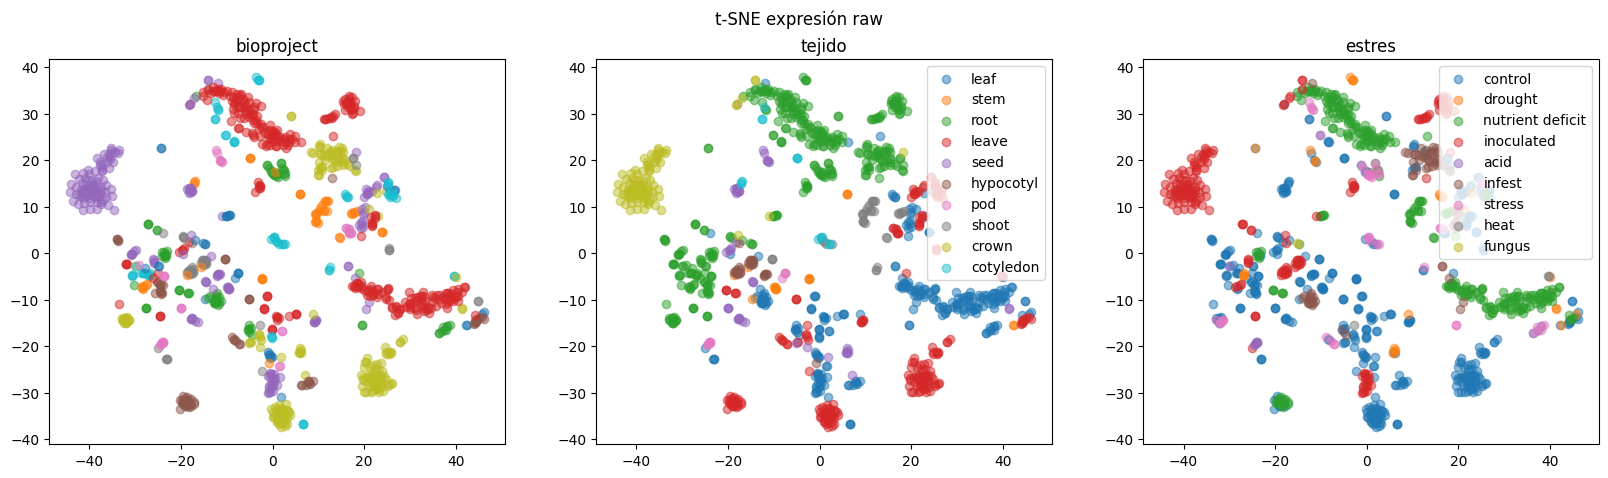

In [6]:
plot_los_tres(venancio, condicion, sra)
plt.suptitle('t-SNE expresión raw')

## Filtro observaciones y features

Varianza 0

In [7]:
venancio.loc[:, venancio.var() <= 0.01]

Gene,Glyma.01G001900,Glyma.01G002800,Glyma.01G003300,Glyma.01G005900,Glyma.01G008300,Glyma.01G015800,Glyma.01G017150,Glyma.01G018500,Glyma.01G021450,Glyma.01G021800,...,Glyma.U031128,Glyma.U031201,Glyma.U031215,Glyma.U031301,Glyma.U031417,Glyma.U031708,Glyma.U036600,Glyma.U036800,Glyma.U043101,Glyma.U043900
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00133783,0.018557,0.000000,0.000000,0.000000,0.000000,0.019450,0.000000,0.082593,0.071866,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.027235,0.0,0.000000,0.0,0.0
SAMD00133784,0.004267,0.112613,0.000000,0.000000,0.000000,0.022665,0.000000,0.032534,0.000000,0.406699,...,0.0,0.0,0.000000,0.08955,0.000000,0.014847,0.0,0.000000,0.0,0.0
SAMD00133785,0.027092,0.000000,0.107266,0.246248,0.000000,0.000000,0.174331,0.215107,0.242846,0.000000,...,0.0,0.0,0.000000,0.00000,0.038555,0.047666,0.0,0.000000,0.0,0.0
SAMD00133786,0.073756,0.068609,0.131367,0.296083,0.143228,0.188293,0.000000,0.067120,0.220101,0.675898,...,0.0,0.0,0.377099,0.00000,0.041950,0.155226,0.0,0.000000,0.0,0.0
SAMD00133787,0.000000,0.000000,0.000000,0.000000,0.000000,0.050453,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.018947,0.0,0.194762,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN27611596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0
SAMN27611597,0.000000,0.150779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0
SAMN27616102,0.048733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [8]:
condicion['estres'].value_counts()

estres
control             397
nutrient deficit    280
inoculated          195
infest               70
stress               49
drought              28
acid                  7
heat                  4
fungus                2
Name: count, dtype: int64

In [9]:
consamples = sra['bioproject'].map(sra['bioproject'].value_counts() > 2)
conestres = condicion['estres'].map(condicion['estres'].value_counts() > 10)
convarianza = venancio.var() > 0.01

filtrado = venancio.loc[consamples & conestres, convarianza]

filtrado

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00133783,0.060465,0.000000,0.089535,0.474168,0.000000,0.000000,1.322525,0.000000,0.890665,0.510335,...,0.000000,0.000000,0.0,0.0,0.0,0.336728,0.000000,3.097900,0.000000,0.368395
SAMD00133784,0.268288,0.000000,0.000000,0.000000,1.097298,0.552712,2.534428,0.000000,1.332167,1.655991,...,0.000000,0.000000,0.0,0.0,0.0,0.244315,0.000000,0.000000,0.000000,2.622882
SAMD00133785,0.000000,0.000000,0.381026,4.035765,0.000000,0.000000,6.377694,0.000000,7.959403,2.861714,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,13.183499,0.000000,12.379582
SAMD00133786,0.000000,0.000000,0.000000,0.000000,0.000000,0.913273,2.765897,0.000000,3.659012,3.590783,...,0.000000,0.000000,0.0,0.0,0.0,1.211080,0.000000,0.000000,0.334363,1.434849
SAMD00133787,0.680006,15.839877,0.000000,2.067646,4.618527,3.402671,2.497416,0.000000,1.952661,2.247744,...,0.000000,0.000000,0.0,0.0,0.0,1.549553,0.000000,38.015705,0.000000,1.862177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN27611596,9.731728,0.000000,8.342684,20.958847,14.258405,8.239529,6.655241,1.972861,5.533095,7.903419,...,0.128525,0.000000,0.0,0.0,0.0,1.901121,0.000000,8.713470,0.108495,0.792025
SAMN27611597,8.617889,0.000000,8.915735,12.297531,18.541181,7.066006,5.026761,4.182691,5.349688,9.463723,...,0.553265,0.000000,0.0,0.0,0.0,1.512491,0.000000,13.551918,0.000000,0.277720
SAMN27616102,9.123773,0.000000,5.435758,4.194809,6.895311,1.008652,3.889615,2.100189,5.679579,2.854997,...,0.000000,2.535471,0.0,0.0,0.0,0.000000,0.453530,0.000000,1.709082,2.095926


In [10]:
condicion, filtrado = condicion.align(filtrado, join='inner', axis=0)
sra, condicion = sra.align(condicion, join='right', axis=0)

## Batch correction

In [11]:
combat = pycombat(filtrado.T, sra['bioproject']).T
combat

Found 62 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/godo/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00133783,6.924518,29.835985,4.761391,4.106673,9.320766,3.314123,1.439646,4.556153,3.442350,1.993952,...,0.128075,0.135838,1.349802,0.116118,0.017499,1.608433,0.098845,10.420112,0.115591,0.486876
SAMD00133784,7.270045,29.835985,4.686337,3.506114,10.247405,3.957680,2.191914,4.556153,3.822768,3.385274,...,0.128075,0.135838,1.349802,0.116118,0.017499,1.535556,0.098845,8.112366,0.115591,0.988025
SAMD00133785,6.823989,29.835985,5.005739,8.617622,9.320766,3.314123,4.577555,4.556153,9.533094,4.849544,...,0.128075,0.135838,1.349802,0.116118,0.017499,1.342888,0.098845,17.933264,0.115591,3.156840
SAMD00133786,6.823989,29.835985,4.686337,3.506114,9.320766,4.377504,2.335594,4.556153,5.827683,5.734950,...,0.128075,0.135838,1.349802,0.116118,0.017499,2.297950,0.098845,8.112366,0.396186,0.723938
SAMD00133787,7.954568,51.405120,4.686337,6.124896,13.220991,7.276068,2.168939,4.556153,4.357414,4.103919,...,0.128075,0.135838,1.349802,0.116118,0.017499,2.564871,0.098845,36.431735,0.115591,0.818928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN27611596,12.819571,29.092234,3.564989,9.634893,-15.178527,3.400272,3.922222,2.416189,3.928107,4.425388,...,-0.127678,-0.038345,0.834302,0.095730,0.011083,3.799983,0.084496,11.365298,0.287410,1.560194
SAMN27611597,6.759789,29.092234,7.366289,5.290435,7.033293,2.074691,1.189210,6.669298,3.337891,5.273754,...,0.923298,-0.038345,0.834302,0.095730,0.011083,2.501990,0.084496,27.721832,0.071240,0.104698
SAMN27616102,7.317174,28.502442,5.325761,6.353471,11.355751,2.974945,3.085824,5.264041,6.943408,3.681307,...,0.105333,0.539355,0.845772,0.098199,0.011242,1.760895,0.203232,9.462809,0.708149,1.843489


In [12]:
estandar = filtrado.groupby(sra['bioproject']).apply(lambda g: pd.DataFrame(preprocessing.scale(g), index=g.index, columns=g.columns)).droplevel('bioproject')
# estandar = estandar.groupby(condicion['tejido']).apply(lambda g: pd.DataFrame(preprocessing.scale(g), index=g.index, columns=g.columns)).droplevel('tejido')
estandar

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00133783,-0.725793,-0.447214,-0.418713,-0.413558,-0.704578,-0.916085,-1.020707,-0.447214,-0.812751,-1.706911,...,0.000000,0.000000,0.0,0.0,0.0,-0.719568,0.000000,-0.432301,-0.447214,-0.712726
SAMD00133784,-0.165540,-0.447214,-0.703178,-0.728776,-0.032674,-0.446139,-0.262572,-0.447214,-0.631716,-0.514405,...,0.000000,0.000000,0.0,0.0,0.0,-0.820152,0.000000,-0.657319,-0.447214,-0.165062
SAMD00133785,-0.888795,-0.447214,0.507394,1.954129,-0.704578,-0.916085,2.141675,-0.447214,2.085730,0.740624,...,0.000000,0.000000,0.0,0.0,0.0,-1.086070,0.000000,0.300275,-0.447214,2.205052
SAMD00133786,-0.888795,-0.447214,-0.703178,-0.728776,-0.704578,-0.139570,-0.117771,-0.447214,0.322388,1.499507,...,0.000000,0.000000,0.0,0.0,0.0,0.232095,0.000000,-0.657319,2.236068,-0.453661
SAMD00133787,0.944377,2.236068,-0.703178,0.645758,2.123468,1.977050,-0.285726,-0.447214,-0.377288,0.101546,...,0.000000,0.000000,0.0,0.0,0.0,0.600496,0.000000,2.103983,-0.447214,-0.349854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN27611596,1.336445,0.000000,-0.472622,1.385204,-1.156581,-0.516209,1.379151,-1.310712,-0.583172,-1.394783,...,-0.417650,-0.707107,0.0,0.0,0.0,1.018259,0.000000,-0.103977,1.414214,1.413629
SAMN27611597,-0.267678,0.000000,1.390638,-0.939396,-0.126508,-0.882135,-0.960606,1.115275,-0.824180,0.899714,...,1.378943,-0.707107,0.0,0.0,0.0,0.340789,0.000000,1.273419,-0.707107,-0.742033
SAMN27616102,-0.173516,-0.707107,0.192480,1.076917,0.698538,-1.392082,0.494069,0.965520,1.408476,-0.824313,...,0.000000,1.206356,0.0,0.0,0.0,0.000000,0.309952,-0.707107,1.389863,1.381892


Text(0.5, 0.98, 't-SNE expresión estandarizada')

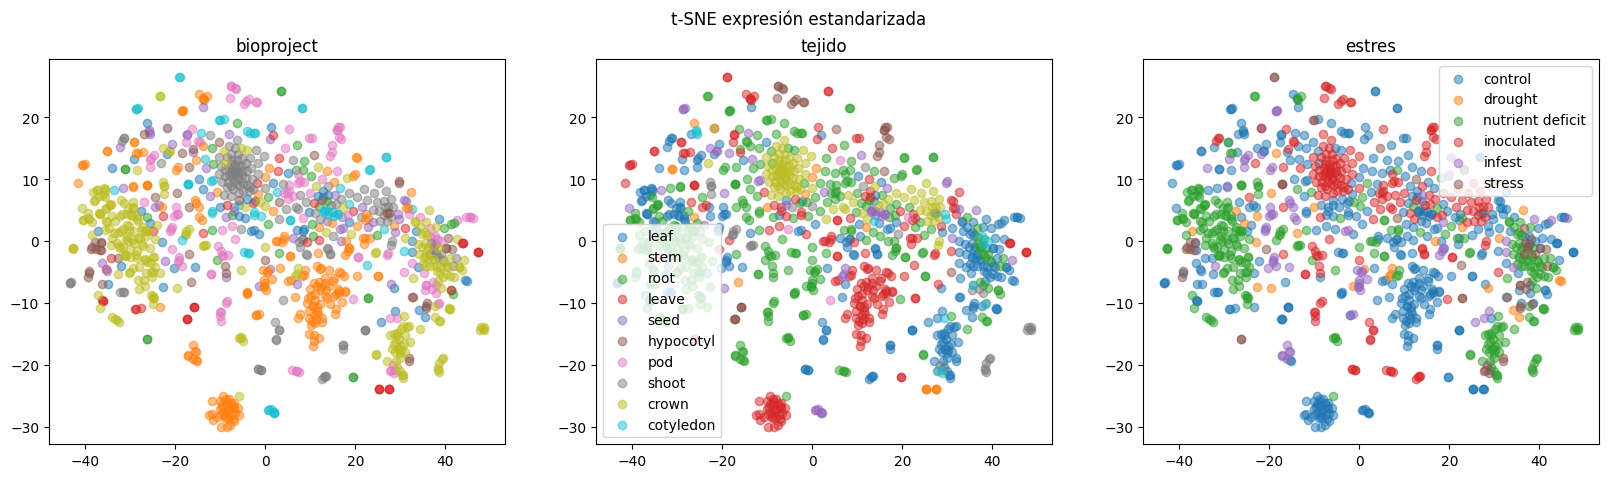

In [13]:
plot_los_tres(estandar, condicion, sra)
plt.suptitle('Expresión estandarizada')

Text(0.5, 0.98, 't-SNE expresión ComBat-seq')

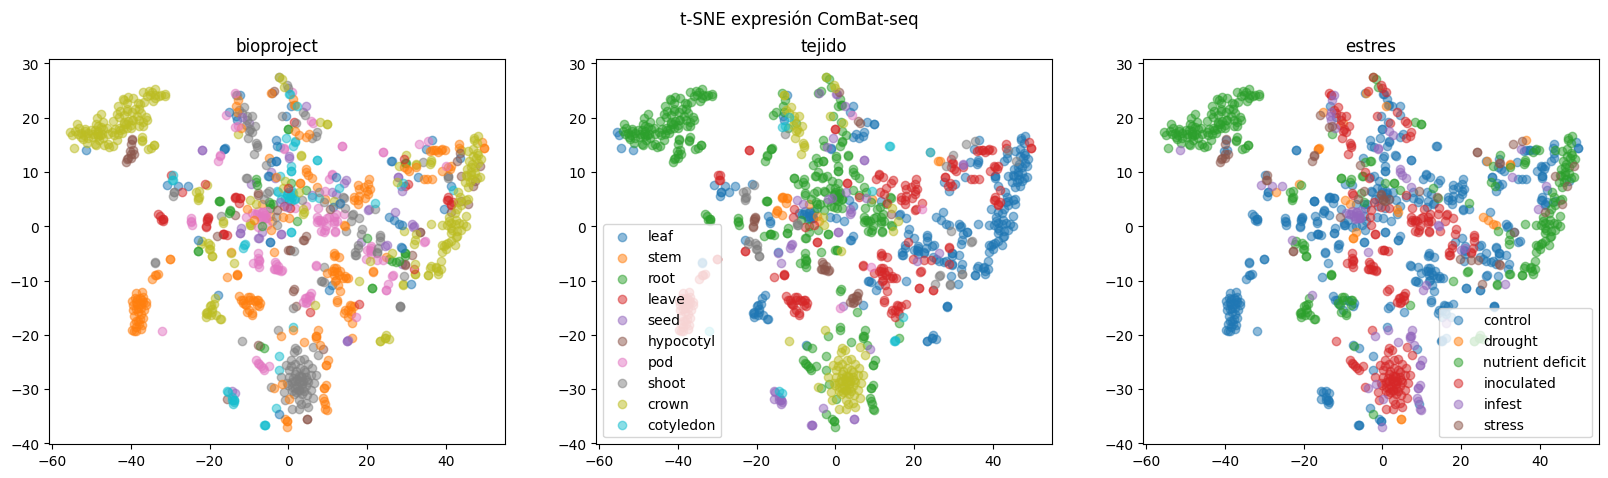

In [14]:
plot_los_tres(combat, condicion, sra)
plt.suptitle('Expresión ComBat-seq')

In [15]:
combat.to_parquet('combat.parquet')
estandar.to_parquet('estandar.parquet')
condicion.to_parquet('condicion.parquet')
sra.to_csv('sra.csv')